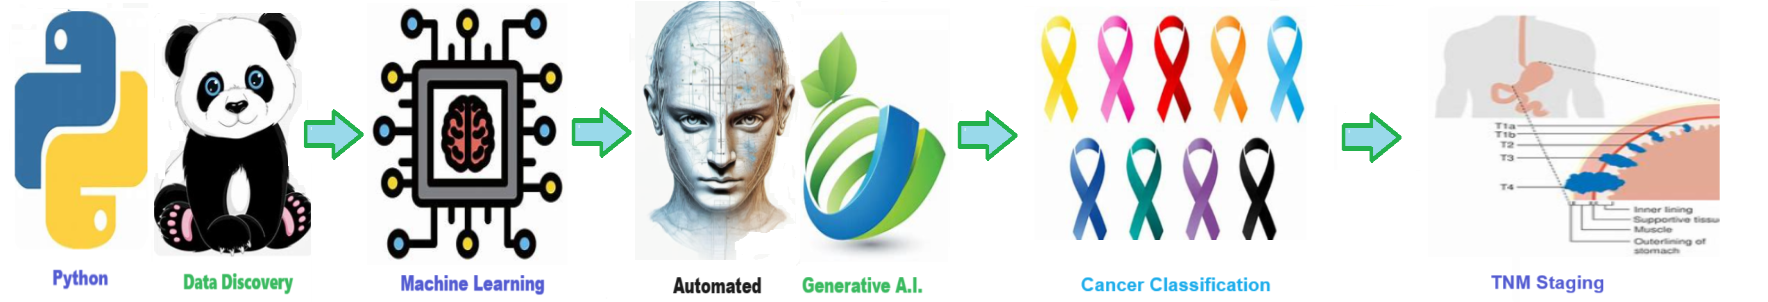

# Cancer Classification

## Classification to top 20 USA cancers and TNM Staging

#### by Joe Eberle started on 11-23-2023 - https://github.com/JoeEberle/ - josepheberle@outlook.com

In [1]:
first_install = False 
if first_install:
    !pip install schedule
    !pip install zipp

In [2]:
import os
import schedule
from datetime import datetime
import pandas as pd 
import json
import quick_logger as ql
import talking_code as tc 
import file_manager as fm 
import time
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2024-03-22 at 00:22:08.880488


## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [3]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'cancer_classification'

## Optional Step 0 - Intitiate Logging and debugging 

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process cancer_classification Step 0 - Initializing and starting Logging Process.


In [5]:
definition = '''
The TNM cancer staging system is overseen and maintained by the Union for International Cancer Control (UICC) in collaboration with the American Joint Committee on Cancer (AJCC). These organizations work together to develop and update the TNM staging system, which provides a standardized framework for assessing the extent of cancer spread based on tumor size (T), lymph node involvement (N), and distant metastasis (M). The UICC and AJCC regularly update the TNM staging guidelines to reflect advances in cancer research and clinical practice.
''' 
talking_code = True
if talking_code:
    tc.print_say(definition)



The TNM cancer staging system is overseen and maintained by the Union for International Cancer Control (UICC) in collaboration with the American Joint Committee on Cancer (AJCC). These organizations work together to develop and update the TNM staging system, which provides a standardized framework for assessing the extent of cancer spread based on tumor size (T), lymph node involvement (N), and distant metastasis (M). The UICC and AJCC regularly update the TNM staging guidelines to reflect advances in cancer research and clinical practice.



## Cancer Staging T, N, M 

In [6]:
oncology_classes_json = { 
  "oncology_classes": [
    {
      "cancer_class": "Lung Cancer",
      "cancer_ordinal": 1,
      "definition": "Cancer that starts in the lungs, typically in the cells that line the air passages.",
      "starting_ICD10_CM_diagnosis_code": "C34.0",
      "ending_ICD10_CM_diagnosis_code": "C34.9"
    },
    {
      "cancer_class": "Breast Cancer",
      "cancer_ordinal": 2,
      "definition": "Cancer that forms in the cells of the breasts, commonly in the ducts or lobules.",
      "starting_ICD10_CM_diagnosis_code": "C50.011",
      "ending_ICD10_CM_diagnosis_code": "C50.929"
    },
    {
      "cancer_class": "Colorectal Cancer",
      "cancer_ordinal": 3,
      "definition": "Cancer that starts in the colon or rectum, often from growths called polyps.",
      "starting_ICD10_CM_diagnosis_code": "C18.0",
      "ending_ICD10_CM_diagnosis_code": "C20.9"
    },
    {
      "cancer_class": "Prostate Cancer",
      "cancer_ordinal": 4,
      "definition": "Cancer that occurs in the prostate gland in men, usually growing slowly.",
      "starting_ICD10_CM_diagnosis_code": "C61",
      "ending_ICD10_CM_diagnosis_code": "C61.9"
    },
    {
      "cancer_class": "Skin Cancer (Non-Melanoma)",
      "cancer_ordinal": 5,
      "definition": "Cancer that starts in the skin's basal or squamous cells, usually due to sun exposure.",
      "starting_ICD10_CM_diagnosis_code": "C44.00",
      "ending_ICD10_CM_diagnosis_code": "C44.99"
    },
    {
      "cancer_class": "Bladder Cancer",
      "cancer_ordinal": 6,
      "definition": "Cancer that begins in the bladder, often characterized by blood in the urine.",
      "starting_ICD10_CM_diagnosis_code": "C67.0",
      "ending_ICD10_CM_diagnosis_code": "C67.9"
    },
    {
      "cancer_class": "Non-Hodgkin Lymphoma",
      "cancer_ordinal": 7,
      "definition": "A group of blood cancers that develop from lymphocytes, affecting lymph nodes and other tissues.",
      "starting_ICD10_CM_diagnosis_code": "C82.10",
      "ending_ICD10_CM_diagnosis_code": "C85.99"
    },
    {
      "cancer_class": "Kidney Cancer",
      "cancer_ordinal": 8,
      "definition": "Cancer that originates in the kidneys, often as renal cell carcinoma.",
      "starting_ICD10_CM_diagnosis_code": "C64.9",
      "ending_ICD10_CM_diagnosis_code": "C64.9"
    },
    {
      "cancer_class": "Thyroid Cancer",
      "cancer_ordinal": 9,
      "definition": "Cancer that forms in the thyroid gland, usually with a high survival rate.",
      "starting_ICD10_CM_diagnosis_code": "C73",
      "ending_ICD10_CM_diagnosis_code": "C73.9"
    },
    {
      "cancer_class": "Pancreatic Cancer",
      "cancer_ordinal": 10,
      "definition": "Cancer that begins in the pancreas, often detected at an advanced stage.",
      "starting_ICD10_CM_diagnosis_code": "C25.0",
      "ending_ICD10_CM_diagnosis_code": "C25.9"
    },
    {
      "cancer_class": "Leukemia",
      "cancer_ordinal": 11,
      "definition": "Cancer of the body's blood-forming tissues, including bone marrow and lymphatic system.",
      "starting_ICD10_CM_diagnosis_code": "C91.00",
      "ending_ICD10_CM_diagnosis_code": "C95.92"
    },
    {
      "cancer_class": "Liver Cancer",
      "cancer_ordinal": 12,
      "definition": "Cancer that begins in the liver cells, often associated with underlying liver disease.",
      "starting_ICD10_CM_diagnosis_code": "C22.0",
      "ending_ICD10_CM_diagnosis_code": "C22.9"
    },
    {
      "cancer_class": "Melanoma",
      "cancer_ordinal": 13,
      "definition": "A type of skin cancer that begins in melanocytes, often appearing as a mole or dark spot.",
      "starting_ICD10_CM_diagnosis_code": "C43.0",
      "ending_ICD10_CM_diagnosis_code": "C43.9"
    },
    {
      "cancer_class": "Ovarian Cancer",
      "cancer_ordinal": 14,
      "definition": "Cancer that forms in the ovaries, often detected at an advanced stage.",
      "starting_ICD10_CM_diagnosis_code": "C56.9",
      "ending_ICD10_CM_diagnosis_code": "C56.9"
    },
    {
      "cancer_class": "Esophageal Cancer",
      "cancer_ordinal": 15,
      "definition": "Cancer that develops in the esophagus, often linked to smoking and alcohol consumption.",
      "starting_ICD10_CM_diagnosis_code": "C15.3",
      "ending_ICD10_CM_diagnosis_code": "C15.9"
    },
    {
      "cancer_class": "Brain Cancer",
      "cancer_ordinal": 16,
      "definition": "Cancer that starts in the brain or spinal cord, often with various types and grades.",
      "starting_ICD10_CM_diagnosis_code": "C71.0",
      "ending_ICD10_CM_diagnosis_code": "C71.9"
    },
    {
      "cancer_class": "Stomach Cancer",
      "cancer_ordinal": 17,
      "definition": "Cancer that begins in the stomach lining, often detected at an advanced stage.",
      "starting_ICD10_CM_diagnosis_code": "C16.0",
      "ending_ICD10_CM_diagnosis_code": "C16.9"
    },
    {
      "cancer_class": "Prostate Cancer",
      "cancer_ordinal": 18,
      "definition": "Cancer that occurs in the prostate gland in men, usually growing slowly.",
      "starting_ICD10_CM_diagnosis_code": "C61",
      "ending_ICD10_CM_diagnosis_code": "C61.9"
    },
    {
      "cancer_class": "Endometrial Cancer",
      "cancer_ordinal": 19,
      "definition": "Cancer that forms in the lining of the uterus (endometrium), often diagnosed in postmenopausal women.",
      "starting_ICD10_CM_diagnosis_code": "C54.1",
      "ending_ICD10_CM_diagnosis_code": "C54.9"
    },
    {
      "cancer_class": "Multiple Myeloma",
      "cancer_ordinal": 20,
      "definition": "A cancer of plasma cells, a type of white blood cell, affecting bone marrow and immune function.",
      "starting_ICD10_CM_diagnosis_code": "C90.00",
      "ending_ICD10_CM_diagnosis_code": "C90.02"
    }
]
}


In [7]:
df_oncology_classes =  pd.DataFrame(oncology_classes_json['oncology_classes']) 
df_oncology_classes.head(23) 

,cancer_class,cancer_ordinal,definition,starting_ICD10_CM_diagnosis_code,ending_ICD10_CM_diagnosis_code
0,Lung Cancer,1,"Cancer that starts in the lungs, typically in ...",C34.0,C34.9
1,Breast Cancer,2,"Cancer that forms in the cells of the breasts,...",C50.011,C50.929
2,Colorectal Cancer,3,"Cancer that starts in the colon or rectum, oft...",C18.0,C20.9
3,Prostate Cancer,4,Cancer that occurs in the prostate gland in me...,C61,C61.9
4,Skin Cancer (Non-Melanoma),5,Cancer that starts in the skin's basal or squa...,C44.00,C44.99
5,Bladder Cancer,6,"Cancer that begins in the bladder, often chara...",C67.0,C67.9
6,Non-Hodgkin Lymphoma,7,A group of blood cancers that develop from lym...,C82.10,C85.99
7,Kidney Cancer,8,"Cancer that originates in the kidneys, often a...",C64.9,C64.9
8,Thyroid Cancer,9,"Cancer that forms in the thyroid gland, usuall...",C73,C73.9
9,Pancreatic Cancer,10,"Cancer that begins in the pancreas, often dete...",C25.0,C25.9


In [8]:
def write_json_to_disk(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f)

json_filename = 'oncology_classes.json'
write_json_to_disk(oncology_classes_json, json_filename)

In [9]:
cancer_stages = {
  "TNM_staging": [
    {
      "stage": "Stage 0",
      "definition": "Carcinoma in situ; cancer cells are present but have not invaded nearby tissues.",
      "T": "Tis",
      "N": "N0",
      "M": "M0"
    },
    {
      "stage": "Stage I",
      "definition": "Early-stage cancer; tumor is small and localized, with no lymph node involvement or distant metastasis.",
      "T": ["T1", "T2"],
      "N": "N0",
      "M": "M0"
    },
    {
      "stage": "Stage II",
      "definition": "Locally advanced cancer; tumor is larger or involves nearby lymph nodes but has not spread to distant sites.",
      "T": ["T1", "T2", "T3"],
      "N": ["N1", "N2"],
      "M": "M0"
    },
    {
      "stage": "Stage III",
      "definition": "Locally advanced cancer; tumor is large, involves nearby lymph nodes, and may have spread to adjacent tissues.",
      "T": ["T1", "T2", "T3", "T4"],
      "N": ["N1", "N2", "N3"],
      "M": "M0"
    },
    {
      "stage": "Stage IV",
      "definition": "Metastatic cancer; cancer has spread to distant organs or tissues.",
      "T": ["Any T"],
      "N": ["Any N"],
      "M": "M1"
    }
  ]
}


In [10]:
json_filename = 'cancer_stages.json'
write_json_to_disk(cancer_stages, json_filename)

In [11]:
df_cancer_stages =  pd.DataFrame(cancer_stages['TNM_staging']) 
df_cancer_stages.head(23) 

,stage,definition,T,N,M
0,Stage 0,Carcinoma in situ; cancer cells are present bu...,Tis,N0,M0
1,Stage I,Early-stage cancer; tumor is small and localiz...,"[T1, T2]",N0,M0
2,Stage II,Locally advanced cancer; tumor is larger or in...,"[T1, T2, T3]","[N1, N2]",M0
3,Stage III,"Locally advanced cancer; tumor is large, invol...","[T1, T2, T3, T4]","[N1, N2, N3]",M0
4,Stage IV,Metastatic cancer; cancer has spread to distan...,[Any T],[Any N],M1


In [12]:
excel_filename = 'cancer_stages.xlsx'
df_cancer_stages.to_excel(excel_filename, index = False) 

In [13]:
excel_filename = 'oncology_classes.xlsx'
df_oncology_classes.to_excel(excel_filename, index = False) 

## Step 0 - Process End - display log

In [14]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2024-03-22 00:22:08,909 - INFO - START cancer_classification =============================================
2024-03-22 00:22:08,909 - INFO - START cancer_classification Start Time = 2024-03-22 00:22:08
2024-03-22 00:22:08,909 - INFO - cancer_classification Step 0 - Initialize the configuration file parser
2024-03-22 00:22:08,909 - INFO - Process cancer_classification Step 0 - Initializing and starting Logging Process.
2024-03-22 00:22:08,947 - INFO - Imported existing <module 'comtypes.gen' from 'C:\\Users\\josep\\anaconda3\\lib\\site-packages\\comtypes\\gen\\__init__.py'>
2024-03-22 00:22:08,947 - INFO - Using writeable comtypes cache directory: 'C:\Users\josep\anaconda3\lib\site-packages\comtypes\gen'
2024-03-22 00:22:40,892 - INFO - PERFORMANCE cancer_classification The total process duration was:31.98
2024-03-22 00:22:40,893 - INFO - PERFORMANCE cancer_classification Stop Time = 2024-03-22 00:22:40
2024-03-22 00:22:40,893 - INFO - PERFORMANCE cancer_classification Low process durati

#### https://github.com/JoeEberle/ -- josepheberle@outlook.com